<a href="https://colab.research.google.com/github/amishra026/IBM-312-Breast-Cancer-Classification/blob/main/IBM_312_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import metric libraries
from sklearn.metrics import classification_report, confusion_matrix
 
%matplotlib inline
 
#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)
 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

# **DATA VISUALIZATION**

In [ ]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_cancer.shape

(569, 31)

In [ ]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

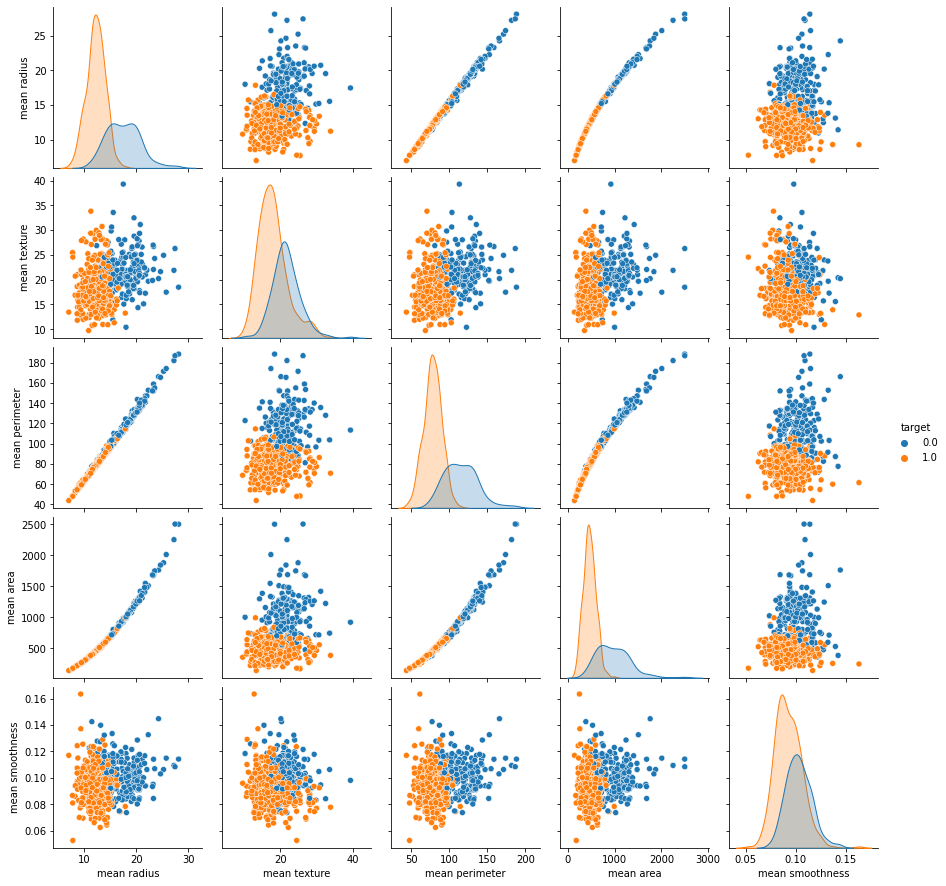

In [ ]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:**

1.0 (Orange) = Benign (No Cancer)

0.0 (Blue) = Malignant (Cancer)

In [ ]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

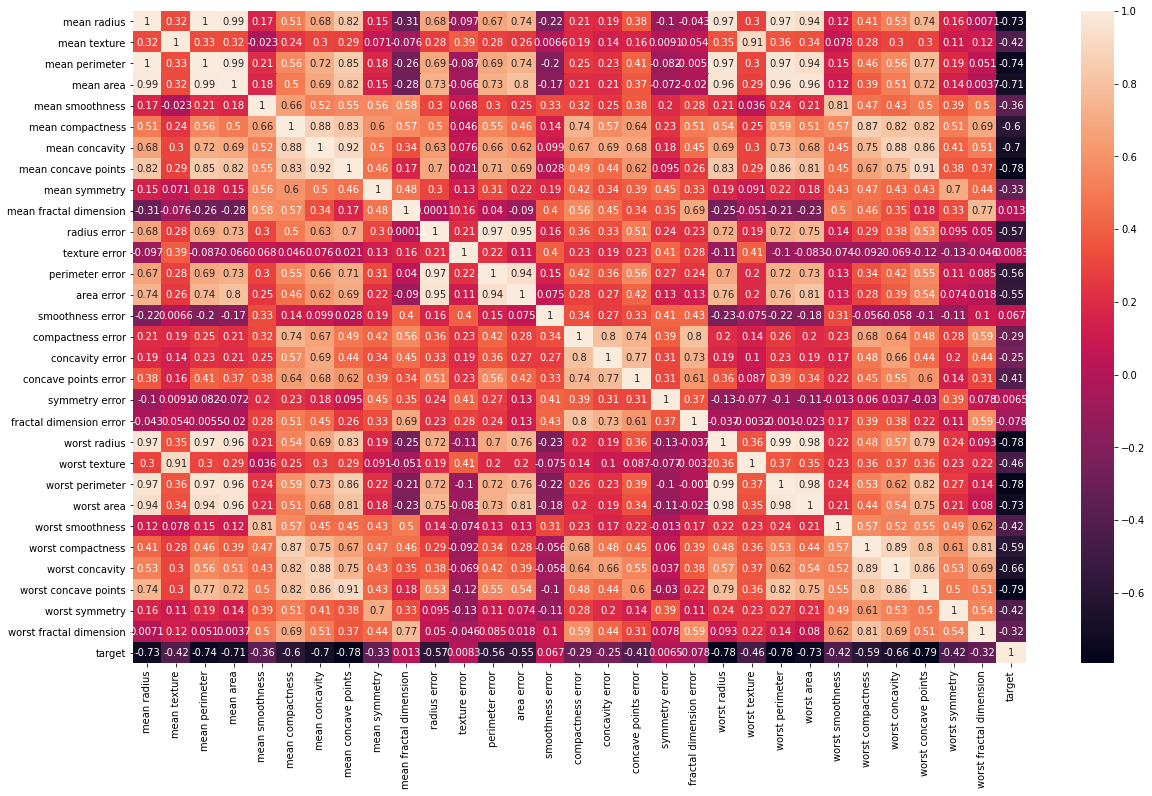

In [ ]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True)

# Visulalization using PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

x = df_cancer.loc[:, features].values
y = df_cancer.loc[:,['target']].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3' ])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,9.192837,1.948584,-1.123149
1,2.387802,-3.768170,-0.529253
2,5.733896,-1.075174,-0.551745
3,7.122953,10.275590,-3.232772
4,3.935302,-1.948072,1.389758


In [ ]:
df_cancer[['target']].head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
finalDf = pd.concat([principalDf, df_cancer[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,9.192837,1.948584,-1.123149,0.0
1,2.387802,-3.768170,-0.529253,0.0
2,5.733896,-1.075174,-0.551745,0.0
3,7.122953,10.275590,-3.232772,0.0
4,3.935302,-1.948072,1.389758,0.0


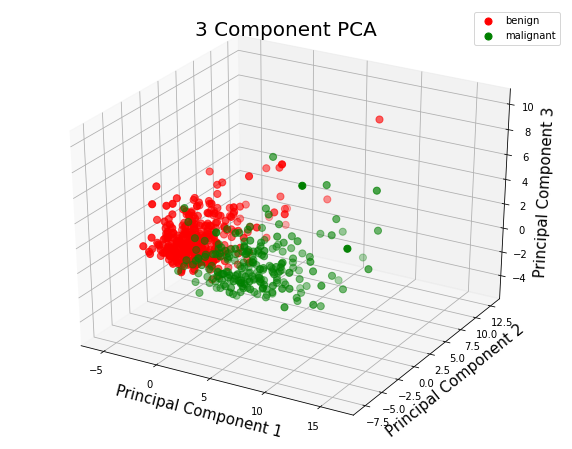

In [ ]:
ax = plt.figure(figsize = (10,8)).gca(projection='3d')
 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = [1.0, 0.0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['benign','malignant'])
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

In [ ]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# **Data Splitting** 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (426, 30)


The size of our testing "X" (input features) is (143, 30)


The size of our training "y" (output feature) is (426,)


The size of our testing "y" (output features) is (143,)


In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.016080,0.02137,0.006142,17.52,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.14090
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.021150,0.01536,0.011870,0.01522,0.002815,16.25,26.19,109.10,809.8,0.1313,0.30300,0.18040,0.14890,0.2962,0.08472
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,0.4727,1.240,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.29140,0.16090,0.3029,0.08216
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,0.2104,0.967,1.356,12.97,0.007086,0.007247,0.01012,0.005495,0.01560,0.002606,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,0.2070,1.238,1.234,13.88,0.007595,0.015000,0.01412,0.008578,0.01792,0.001784,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007


In [ ]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,0.5462,1.5110,4.795,49.45,0.009976,0.052440,0.05278,0.015800,0.02653,0.005444,16.46,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.023360,0.02905,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,0.2094,0.7636,1.231,17.67,0.008725,0.020030,0.02335,0.011320,0.02625,0.004726,13.74,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,0.4681,1.6270,3.043,45.38,0.006831,0.014270,0.02489,0.009087,0.03151,0.001750,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


# **NORMALISE TRAINING DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
# transform training data using min-max scaling
X_train_scaled = norm.transform(X_train)
print(X_train_scaled)

[[0.389938   0.70713561 0.4119273  ... 0.80962199 0.59957224 0.91755006]
 [0.37763264 0.31755157 0.36790823 ... 0.51168385 0.33174905 0.31598672]
 [0.36438071 0.35238417 0.35208348 ... 0.55292096 0.3476711  0.28857479]
 ...
 [0.48364807 0.50084545 0.48655933 ... 0.65257732 0.4151616  0.84259557]
 [0.3336173  0.3902604  0.31787713 ... 0.27364261 0.15684411 0.22443516]
 [0.28628899 0.29455529 0.26826066 ... 0.17226804 0.10004753 0.06938644]]


In [ ]:

# transform testing dataabs
X_test_scaled = norm.transform(X_test)
print(X_test_scaled)

[[0.36485399 0.14440311 0.37613157 ... 0.38075601 0.2996673  0.39479602]
 [0.29291495 0.30267163 0.29154861 ... 0.71752577 0.55465779 0.67127101]
 [0.28250272 0.21339195 0.27192316 ... 0.3628866  0.43108365 0.43505729]
 ...
 [0.38189219 0.31653703 0.36949762 ... 0.38487973 0.17015209 0.15344255]
 [0.58777036 0.46635103 0.58952388 ... 0.53745704 0.32176806 0.22411393]
 [0.23233471 0.38755495 0.22527814 ... 0.28395189 0.35860266 0.19595246]]


In [ ]:
def model_eval(model,X_train_scaled,y_train, X_test_scaled, y_test) :
  model.fit(X_train_scaled,y_train)
  y_predict= model.predict(X_test_scaled)
# model.fit(X_train,y_train)
# y_predict= model.predict(X_test)
  
  cm = confusion_matrix(y_test,y_predict)
  cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
  # label 1 for malignant and 0 for benign
  print(classification_report(y_test,y_predict))
  confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healthy'])
  print("\n\n             Confusion Matrix")
  sns.heatmap(confusion,annot=True,fmt="d")

# **Support Vector Machine(SVMs)**

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        55
         1.0       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



             Confusion Matrix


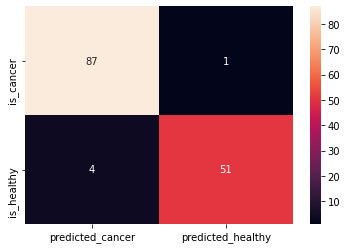

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
model_eval(svc_model,X_train_scaled,y_train, X_test_scaled, y_test)

# **Logistic Regression**

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        55
         1.0       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



             Confusion Matrix


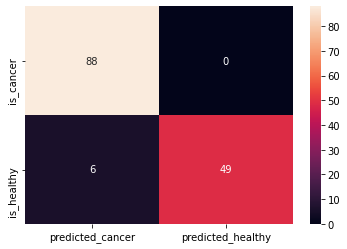

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
model_eval(lr_model,X_train_scaled,y_train, X_test_scaled, y_test)

# **K-Nearest Neighbours(KNN)**

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93        55
         1.0       0.94      0.99      0.96        88

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



             Confusion Matrix


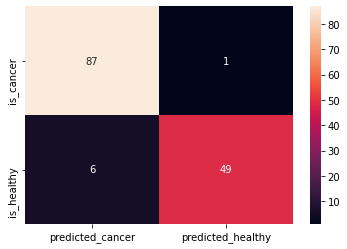

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model_eval(knn_model,X_train_scaled,y_train, X_test_scaled, y_test)

# **Grid Search CV**
We use GridSearchCV to find the optimal hyperparameters for all the three models(Logistic Regression,SVM,KNN).

In [ ]:
def call_GridSearchCv(X_train_scaled,y_train, X_test_scaled, y_test):
  from sklearn import svm
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import GridSearchCV
  model_params = {
    'SVM': {
        'model': svm.SVC(),
        'params' : {
            'C': [0.01,0.1,1,10,30],
            'kernel': ['rbf','linear','sigmoid'],
            'gamma' : [0.0001,0.001,0.01,0.1,1]
        }  
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.1,1,5,10,20]
        }
    },
      'KNN': {
        'model': KNeighborsClassifier( metric='minkowski', p=2),  
        'params' : {
            'n_neighbors': [3,5,7,9,15],
            'weights' : ['uniform','distance']   
        }
    }
  }
  scores = []
  c=1
  for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    print(c,"->",model_name," gives best score of ",clf.best_score_," with following hyperparameters : ",clf.best_params_)
    c=c+1
    clf_predictions = clf.predict(X_test_scaled)
    print("\n                   Testing Performance on test data\n")
    print(classification_report(y_test, clf_predictions),"\n") 

    

In [ ]:
call_GridSearchCv(X_train_scaled,y_train, X_test_scaled, y_test)

1 -> SVM  gives best score of  0.9765253077975377  with following hyperparameters :  {'C': 30, 'gamma': 0.1, 'kernel': 'rbf'}

                   Testing Performance on test data

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        55
         1.0       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143
 

2 -> Logistic Regression  gives best score of  0.96484268125855  with following hyperparameters :  {'C': 20}

                   Testing Performance on test data

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        55
         1.0       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143
 


# **PCA for Dimensionality Reduction**

In [ ]:
pca = PCA(.95)
#PCA is used to select minimum features so as to represent atleast 95% of the info regarding training data 
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

10

In [ ]:
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.52494788, 0.16987286, 0.07536766, 0.06487541, 0.04063867,
       0.03221819, 0.01826094, 0.012099  , 0.01004129, 0.00921917])

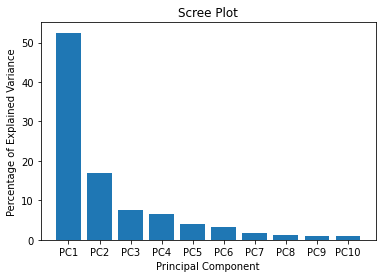

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# **Model Analysis using the selected features**

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        55
         1.0       0.96      0.98      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



             Confusion Matrix


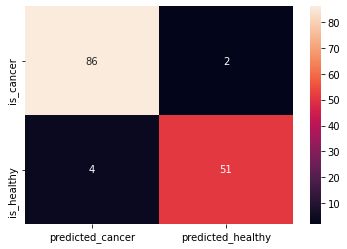

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
model_eval(svc_model,X_train_scaled_pca,y_train, X_test_scaled_pca, y_test)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        55
         1.0       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



             Confusion Matrix


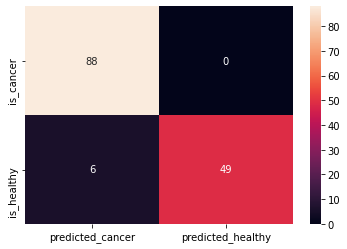

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
model_eval(lr_model,X_train_scaled_pca,y_train, X_test_scaled_pca, y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        55
         1.0       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



             Confusion Matrix


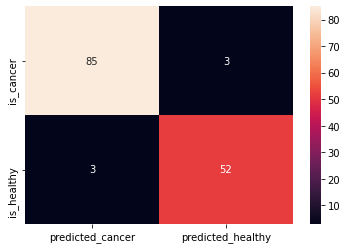

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )  
model_eval(knn_model,X_train_scaled_pca,y_train, X_test_scaled_pca, y_test)

In [ ]:
call_GridSearchCv(X_train_scaled_pca,y_train, X_test_scaled_pca, y_test)

1 -> SVM  gives best score of  0.9742544459644323  with following hyperparameters :  {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}

                   Testing Performance on test data

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        55
         1.0       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143
 

2 -> Logistic Regression  gives best score of  0.9741997264021889  with following hyperparameters :  {'C': 10}

                   Testing Performance on test data

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        55
         1.0       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96     